In [44]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data import DataLoader

In [45]:
transform = transforms.Compose([
            transforms.Pad(4),
            transforms.RandomHorizontalFlip(),
            transforms.RandomCrop(32),
            transforms.ToTensor()])

In [46]:
train_dataset = datasets.CIFAR10(root ='./Data', train = True, transform = transforms.ToTensor(), download = False)

In [47]:
# to compute mean and std of the images for normalization
loader = DataLoader(dataset = train_dataset, batch_size = 60000, shuffle = True)

In [48]:
sample = train_dataset[0]

In [49]:
sample[0].shape

torch.Size([3, 32, 32])

In [50]:
for images, labels in loader:
    mean_train = images.mean()
    std_train = images.std()

In [51]:
mean_train

tensor(0.4734)

In [52]:
train_dataset = datasets.CIFAR10(root = "./Data", train = True, transform = transform,
                                              download = False)

In [53]:
test_dataset = datasets.CIFAR10(root = "./Data", train = False, transform = transforms.ToTensor())

In [54]:
len(train_dataset)

50000

In [55]:
type(train_dataset)

torchvision.datasets.cifar.CIFAR10

In [56]:
len(test_dataset)

10000

In [57]:
image, label =train_dataset[0]

In [58]:
image.shape

torch.Size([3, 32, 32])

In [59]:
label

6

In [60]:
img_numpy = image.permute(1,2,0).numpy()

In [61]:
img = img_numpy

In [62]:
import matplotlib.pyplot as plt

In [63]:
img.shape

(32, 32, 3)

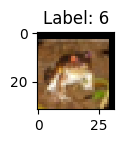

In [64]:
plt.figure(figsize = (1,1))
plt.imshow(img,interpolation='nearest')
plt.title(f"Label: {label}" )
plt.show()


In [65]:
# Convert to batch
train_load = DataLoader(dataset = train_dataset, batch_size = 100, shuffle = True)


In [66]:
test_load = DataLoader(dataset = test_dataset, batch_size = 100, shuffle = False)

In [67]:
len(train_load)

500

In [68]:
# Building the ResNetModel
class ResNet(nn.Module):
    def __init__(self):
        super().__init__()
        ######## 3x3 Conv,16#########
        self.cnn = nn.Conv2d(in_channels = 3, out_channels = 16, kernel_size =3, stride =1, padding =1)
        self.batchnorm = nn.BatchNorm2d(16)
        self.relu = nn.ReLU()
        
        ######## Layer 1 ######### cnn_L_B_C
        self.cnn_1_1_1 = nn.Conv2d(in_channels = 16, out_channels = 16, kernel_size =3, stride =1, padding =1)
        self.batchnorm_1_1_1 = nn.BatchNorm2d(16)
        self.cnn_1_1_2 = nn.Conv2d(in_channels = 16, out_channels = 16, kernel_size =3, stride =1, padding =1)
        self.batchnorm_1_1_2 = nn.BatchNorm2d(16)
        self.cnn_1_2_1 = nn.Conv2d(in_channels = 16, out_channels = 16, kernel_size =3, stride =1, padding =1)
        self.batchnorm_1_2_1 = nn.BatchNorm2d(16)
        self.cnn_1_2_2 = nn.Conv2d(in_channels = 16, out_channels = 16, kernel_size =3, stride =1, padding =1)
        self.batchnorm_1_2_2 = nn.BatchNorm2d(16)
        
        ######## Layer 2 #########
        self.cnn_2_r = nn.Conv2d(in_channels = 16, out_channels = 32, kernel_size =3, stride =2,padding =1)
        self.batchnorm_2_r = nn.BatchNorm2d(32)
        self.cnn_2_1_1 = nn.Conv2d(in_channels = 16, out_channels = 32, kernel_size =3, stride =2,padding =1)
        self.batchnorm_2_1_1 = nn.BatchNorm2d(32)
        self.cnn_2_1_2 = nn.Conv2d(in_channels = 32, out_channels = 32, kernel_size =3, stride =1,padding =1)
        self.batchnorm_2_1_2 = nn.BatchNorm2d(32)
        self.cnn_2_2_1 = nn.Conv2d(in_channels = 32, out_channels = 32, kernel_size =3, stride =1,padding =1)
        self.batchnorm_2_2_1 = nn.BatchNorm2d(32)
        self.cnn_2_2_2 = nn.Conv2d(in_channels = 32, out_channels = 32, kernel_size =3, stride =1,padding =1)
        self.batchnorm_2_2_2 = nn.BatchNorm2d(32)
        ######## Layer 3 #########
        self.cnn_3_r = nn.Conv2d(in_channels = 32, out_channels = 64, kernel_size =3, stride =2,padding=1)
        self.batchnorm_3_r = nn.BatchNorm2d(64)
        self.cnn_3_1_1 = nn.Conv2d(in_channels = 32, out_channels = 64, kernel_size =3, stride =2,padding=1)
        self.batchnorm_3_1_1 = nn.BatchNorm2d(64)
        self.cnn_3_1_2 = nn.Conv2d(in_channels = 64, out_channels = 64, kernel_size =3, stride =1,padding =1)
        self.batchnorm_3_1_2 = nn.BatchNorm2d(64)
        self.cnn_3_2_1 = nn.Conv2d(in_channels = 64, out_channels = 64, kernel_size =3, stride =1,padding =1)
        self.batchnorm_3_2_1 = nn.BatchNorm2d(64)
        self.cnn_3_2_2 = nn.Conv2d(in_channels = 64, out_channels = 64, kernel_size =3, stride =1,padding =1)
        self.batchnorm_3_2_2 = nn.BatchNorm2d(64)
        
        #########################
        self.avgpool = nn.AvgPool2d(kernel_size =8)
        self.fc = nn.Linear(64,10)
        
    def forward(self,x):
        out = self.cnn(x)           # Initial conv 3x3 
        out = self.batchnorm(out)
        out = self.relu(out)
        residual = out  # Residual path 1_1         
        out = self.cnn_1_1_1(out)    # Layer 1 block 1, conv 1  
        out = self.batchnorm_1_1_1(out)
        out = self.relu(out)
        out = self.cnn_1_1_2(out) # Layer 1 block 1, conv 2
        out = self.batchnorm_1_1_2(out)
        out = residual + out   # Layer 1, block 1 addition 
        out = self.relu(out)
        residual = out;    # Residual path 1_2   
        out = self.cnn_1_2_1(out)    # Layer 1 block 2, conv 1
        out = self.batchnorm_1_2_1(out)
        out = self.relu(out)
        out = self.cnn_1_2_2(out) # Layer 1 block 2, conv 2
        out = self.batchnorm_1_2_2(out)
        out = residual + out   # Layer 1, block 2 addition 
        out = self.relu(out)
        residual = self.cnn_2_r(out) 
        residual = self.batchnorm_2_r(residual)
        out = self.cnn_2_1_1(out)    # Layer 2 block 1, conv 1
        out = self.batchnorm_2_1_1(out)
        out = self.relu(out)
        out = self.cnn_2_1_2(out) # Layer 2 block 1, conv 2
        out = self.batchnorm_2_1_2(out)
        out = residual + out   # Layer 2, block 1 addition 
        out = self.relu(out)
        residual = out
        out = self.cnn_2_2_1(out)    # Layer 2 block 2, conv 1
        out = self.batchnorm_2_2_1(out)
        out = self.relu(out)
        out = self.cnn_2_2_2(out) # Layer 2 block 2, conv 2
        out = self.batchnorm_2_2_2(out)
        out = residual + out   # Layer 2, block 2 addition 
        out = self.relu(out)
        residual = self.cnn_3_r(out)
        residual = self.batchnorm_3_r(residual)
       # residual = self.relu(residual)
        out = self.cnn_3_1_1(out)    # Layer 3 block 1, conv 1
        out = self.batchnorm_3_1_1(out)
        out = self.relu(out)
        out = self.cnn_3_1_2(out) # Layer 3 block 1, conv 2
        out = self.batchnorm_3_1_2(out)
        out = residual + out   # Layer 3, block 1 addition 
        out = self.relu(out)
        residual = out
        out = self.cnn_3_2_1(out)    # Layer 3 block 2, conv 1
        out = self.batchnorm_3_2_1(out)
        out = self.relu(out)
        out = self.cnn_3_2_2(out) # Layer 3 block 2, conv 2
        out = self.batchnorm_3_2_2(out)
        out = residual + out   # Layer 3, block 2, addition 
        out = self.relu(out)
        out = self.avgpool(out)
        out = out.view(-1,64)
        out = self.fc(out)
        return out
        
             

In [69]:
model = ResNet()
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.01)


In [70]:
for x,y in train_load:
    print(x.shape)
    print(y.shape)
    break

torch.Size([100, 3, 32, 32])
torch.Size([100])


In [71]:
total_loss = 0
for i, (inputs,labels) in enumerate(train_load):
        output = model(inputs)
        loss_iter  = loss_fn(output,labels)
        optimizer.zero_grad()
        loss_iter.backward()
        optimizer.step()   # w(t+1) = wt - lr*grad
        total_loss += loss_iter.item()
        _,predicted = torch.max(output,1)  # [0.1,0.7,0.2]
        break
print(output)


tensor([[-5.1739e-02,  2.7224e-01, -6.2772e-01,  1.5424e-01, -5.2558e-01,
         -2.1967e-01,  1.0289e-01,  1.5792e-01,  3.9311e-03, -1.1133e-01],
        [ 5.1804e-02,  4.0023e-01, -3.4227e-01, -8.8639e-02, -7.8407e-01,
         -1.6366e-01,  1.7446e-01,  8.0553e-02, -4.9788e-02, -1.2428e-01],
        [-1.0901e-02,  2.9359e-01, -6.1126e-01,  3.1107e-02, -5.4957e-01,
         -2.4953e-01, -6.0296e-03,  1.9403e-01,  5.6530e-02, -2.3260e-01],
        [-8.0003e-02,  4.6732e-01, -1.6809e-01, -2.1857e-01, -8.1616e-01,
         -1.0477e-01,  2.0326e-01,  2.1125e-01, -4.2223e-03, -4.2221e-02],
        [-3.0824e-02,  3.6843e-01, -7.3049e-02, -5.5741e-01, -1.3137e+00,
         -2.2293e-01,  1.9294e-01,  3.7298e-01,  8.0057e-02, -1.4165e-01],
        [ 7.3382e-02,  2.1953e-01, -5.3452e-02, -5.8430e-01, -2.0531e+00,
         -2.8021e-01,  3.1165e-01,  1.6468e-01,  2.1418e-01, -2.8902e-01],
        [-2.8516e-01,  3.8798e-01,  6.0625e-01, -8.4342e-01, -2.0423e+00,
         -5.8528e-01,  2.7186e-0

In [72]:
train_loss = []
train_acc = []
num_epochs = 20

for epoch in range(num_epochs):
    iterations = 0
    total_correct = 0
    total_loss = 0
    model.train()  # model.eval()
    for i, (inputs,labels) in enumerate(train_load):
        output = model(inputs)
        loss_iter  = loss_fn(output,labels)
        optimizer.zero_grad()
        loss_iter.backward()
        optimizer.step()   # w(t+1) = wt - lr*grad
        total_loss += loss_iter.item()
        _,predicted = torch.max(output,1)  # [0.1,0.7,0.2]
        total_correct += (predicted == labels).sum()
        iterations +=1  # 60000 images , in 100 batch size : no of batches: 60000/100 = 600 batches
    avg_loss = total_loss/(iterations)
    avg_acc  = 100*(total_correct/len(train_dataset))
    train_loss.append(avg_loss)
    train_acc.append(avg_acc)
    print("Epochs : {}/{}, Training_loss: {:.3f}, Training_Acc: {:.3f}" .format(epoch+1,num_epochs,avg_loss,avg_acc))
        

Epochs : 1/20, Training_loss: 1.611, Training_Acc: 39.578
Epochs : 2/20, Training_loss: 1.126, Training_Acc: 59.412
Epochs : 3/20, Training_loss: 0.925, Training_Acc: 67.184
Epochs : 4/20, Training_loss: 0.787, Training_Acc: 72.394
Epochs : 5/20, Training_loss: 0.681, Training_Acc: 76.444
Epochs : 6/20, Training_loss: 0.621, Training_Acc: 78.456
Epochs : 7/20, Training_loss: 0.564, Training_Acc: 80.422
Epochs : 8/20, Training_loss: 0.527, Training_Acc: 81.648
Epochs : 9/20, Training_loss: 0.494, Training_Acc: 82.922
Epochs : 10/20, Training_loss: 0.475, Training_Acc: 83.552
Epochs : 11/20, Training_loss: 0.454, Training_Acc: 84.016
Epochs : 12/20, Training_loss: 0.432, Training_Acc: 85.022
Epochs : 13/20, Training_loss: 0.410, Training_Acc: 85.736
Epochs : 14/20, Training_loss: 0.398, Training_Acc: 86.234
Epochs : 15/20, Training_loss: 0.384, Training_Acc: 86.652
Epochs : 16/20, Training_loss: 0.374, Training_Acc: 86.938
Epochs : 17/20, Training_loss: 0.358, Training_Acc: 87.384
Epochs

In [23]:
model.eval()  # model.eval()
iterations = 0
total_correct = 0
total_loss = 0
for i, (inputs,labels) in enumerate(test_load):
        output = model(inputs)
        loss_iter  = loss_fn(output,labels)
        total_loss += loss_iter.item()
        _,predicted = torch.max(output,1)  # [0.1,0.7,0.2]
        total_correct += (predicted == labels).sum()
        iterations +=1  # 10000 images , in 100 batch size : no of batches: 60000/100 = 600 batches
avg_loss = total_loss/(iterations)
avg_acc  = 100*(total_correct/len(test_dataset))
print("Test_Accuracy",avg_acc.item())
print("Test_loss", avg_loss)

Test_Accuracy 85.36000061035156
Test_loss 0.4489305055141449


In [112]:
image = test_dataset[20]

In [116]:
img = image[0]

In [118]:
img.shape

torch.Size([1, 28, 28])

In [126]:
img = img.view((1,1,28,28))

In [127]:
label = image[1]

In [128]:
label

9

In [130]:
model.eval()
output = model(img)
x,predicted = torch.max(output,1)
print("predicted label is", predicted.item())
print("Original label is" , label)



predicted label is 9
Original label is 9


In [136]:
import cv2
from PIL import Image

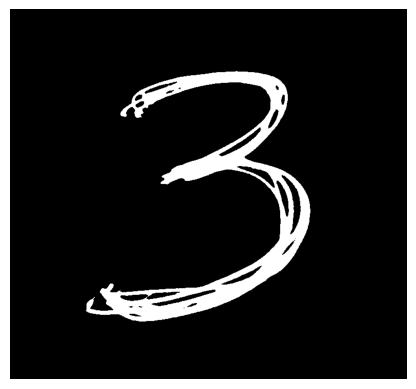

In [145]:
image = cv2.imread("3.jpg",0)
ret,threshold = cv2.threshold(image,100,255,cv2.THRESH_BINARY_INV) 
plt.imshow(threshold,cmap ="gray")
plt.axis("off")
plt.show()


In [146]:
transforms_photo = transforms.Compose([transforms.Resize([28,28]),transforms.ToTensor(),transforms.Normalize(mean_train,std_train)])

In [147]:
# to convert numpy array to PIL image
image = Image.fromarray(threshold)

In [149]:
img = transforms_photo(image)

In [151]:
img = img.view(1,1,28,28)
model.eval()
output = model(img)
x,predicted = torch.max(output,1)
print("The predicted label is ", predicted.item())


The predicted label is  3
